# Linear regression using Tensorflow


Using sklearn iris flowers dataset we're going to test the tensorflow linear regression to predict the lenght of the sepalo using only the lenght of the petalo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets

In [2]:
%config Completer.use_jedi = False
session = tf.Session()
iris = datasets.load_iris()

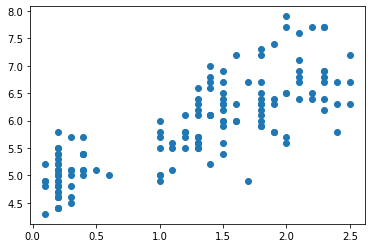

In [3]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

plt.plot(x_vals, y_vals, 'o', label = 'Data')

In [4]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

The equation to solve:

$$y = Ax + b$$

In [5]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [6]:
loss = tf.reduce_mean(tf.square(y_target - y_predict))
my_opt = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [7]:
loss_vect = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x,
                                       y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x,
                                             y_target: rand_y})
    loss_vect.append(temp_loss)
    if (i+1)%10 == 0:
        print('Step #'+str(i+1)+
              ' A = '+str(session.run(A))+
              ' b = '+str(session.run(b))+
              ' Loss = '+str(temp_loss))

Step #10 A = [[1.9524044]] b = [[2.8200338]] Loss = 0.67991996
Step #20 A = [[1.8990587]] b = [[3.285545]] Loss = 0.67283845
Step #30 A = [[1.7097851]] b = [[3.5617542]] Loss = 0.7393382
Step #40 A = [[1.5488656]] b = [[3.7834191]] Loss = 0.53001326
Step #50 A = [[1.3858645]] b = [[3.968127]] Loss = 0.51349413
Step #60 A = [[1.2727225]] b = [[4.105418]] Loss = 0.40984622
Step #70 A = [[1.2157706]] b = [[4.270893]] Loss = 0.2061474
Step #80 A = [[1.1763788]] b = [[4.404247]] Loss = 0.3698902
Step #90 A = [[1.1027392]] b = [[4.4326367]] Loss = 0.19155712
Step #100 A = [[1.0949874]] b = [[4.526038]] Loss = 0.30771306


### Plot the loss funcition using L2 normalization

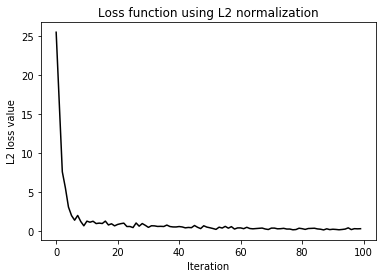

In [8]:
plt.plot(loss_vect, 'k-')
plt.title('Loss function using L2 normalization')
plt.xlabel('Iteration')
plt.ylabel('L2 loss value')
plt.show()

### Linear regression prediction

In [9]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

print('Linear regression equation = ', str(np.round(slope, 3)) + 'x + '+  str(np.round(intercept, 3)))

Linear regression equation =  1.095x + 4.526


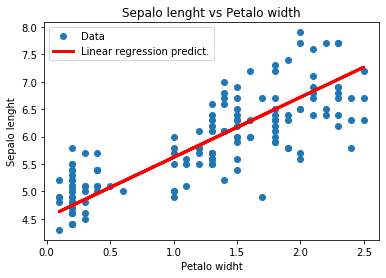

In [10]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i + intercept)
    
plt.plot(x_vals, y_vals, 'o', label = 'Data')
plt.plot(x_vals, best_fit, 'r-', label = 'Linear regression predict.', linewidth = 3)
plt.legend(loc = 'upper left')
plt.title('Sepalo lenght vs Petalo width')
plt.xlabel('Petalo widht')
plt.ylabel('Sepalo lenght')
plt.show()

## Using L1 normalization for the loss function

Now let's try again the training but instead of using L2 we'll use L1 as normalization for the loss function.
Some hyperparameters needs to be changed to fit a correct model

In [11]:
x_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

y_predict = tf.add(tf.matmul(x_data, A), b)

In [12]:
loss_l1 = tf.reduce_mean(tf.abs(y_target - y_predict))
my_opt = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)
train_step = my_opt.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [13]:
loss_vect_l1 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x,
                                       y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data: rand_x,
                                             y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if (i+1)%10 == 0:
        print('Step #'+str(i+1)+
              ' A = '+str(session.run(A))+
              ' b = '+str(session.run(b))+
              ' Loss = '+str(temp_loss))

Step #10 A = [[-0.9820413]] b = [[0.7644147]] Loss = 6.2809577
Step #20 A = [[-0.39504123]] b = [[1.2644145]] Loss = 4.8930926
Step #30 A = [[0.20515877]] b = [[1.7644141]] Loss = 3.7593417
Step #40 A = [[0.8155588]] b = [[2.2644136]] Loss = 2.6759825
Step #50 A = [[1.4237587]] b = [[2.764413]] Loss = 1.3756865
Step #60 A = [[1.7745587]] b = [[3.1444135]] Loss = 0.9161
Step #70 A = [[1.7629585]] b = [[3.320413]] Loss = 0.96011084
Step #80 A = [[1.7397584]] b = [[3.4764128]] Loss = 0.7830337
Step #90 A = [[1.5999584]] b = [[3.5564122]] Loss = 0.6024512
Step #100 A = [[1.6073583]] b = [[3.7124126]] Loss = 0.57635504


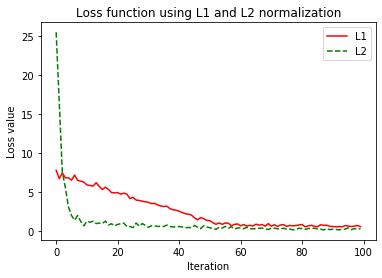

In [14]:
plt.plot(loss_vect_l1, 'r-', label = 'L1')
plt.plot(loss_vect, 'g--', label = 'L2')
plt.title('Loss function using L1 and L2 normalization')
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.legend(loc = 'upper right')
plt.show()

Is clear that L1 method is much more slower to converge.
Learning rate is very important in this case. If we choose a small learning rate L1 would need a lot of time to converge in to the value but a big learning rate doesnt mean a fast converge beacause we can finish reaching a non correct value (maybe a divergence value)

In [15]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

print('Linear regression equation = ', str(np.round(slope, 3)) + 'x + '+  str(np.round(intercept, 3)))

Linear regression equation =  1.607x + 3.712


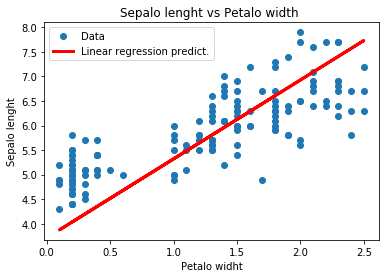

In [16]:
best_fit_l1 = []
for i in x_vals:
    best_fit_l1.append(slope*i + intercept)
    
plt.plot(x_vals, y_vals, 'o', label = 'Data')
plt.plot(x_vals, best_fit_l1, 'r-', label = 'Linear regression predict.', linewidth = 3)
plt.legend(loc = 'upper left')
plt.title('Sepalo lenght vs Petalo width ')
plt.xlabel('Petalo widht')
plt.ylabel('Sepalo lenght')
plt.show()